<a href="https://colab.research.google.com/github/aulia-anhar/capstone-obesity-prediction/blob/main/obesity-calssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - Obesity Classification with Machine Learning**

# **1. Exploratory Data Analysis (EDA)** 
### A. Impor Library & Load Data

In [33]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#Pemodelan
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Parameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import loguniform
from sklearn.svm import SVC

import numpy as np
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from scipy.stats import uniform
from imblearn.pipeline import Pipeline as ImbPipeline

In [2]:
# Tampilkan semua kolom saat dipanggil
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv('C:/Users/Anhar/Documents/#semester 6/Bengkod/capstone-obesity-prediction/dataset/ObesityDataSet.csv')

# Tampilkan 5 baris pertama
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


### B. Informasi Umum Dataset

In [3]:
# Informasi jumlah baris, kolom, dan tipe data
print("Informasi Umum Dataset:")
df.info()


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                     

In [4]:
# Deskripsi statistik (khusus data numerik)
print("\nDeskripsi Statistik:")
df.describe()



Deskripsi Statistik:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


### C. Cek Missing Values, Unique Values, dan Duplikat

In [5]:
# Cek missing values
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

Jumlah Missing Values per Kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [6]:
# Cek nilai unik tiap kolom
print("\nJumlah Nilai Unik per Kolom:")
print(df.nunique())


Jumlah Nilai Unik per Kolom:
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [7]:
# Cek data duplikat
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())


Jumlah Data Duplikat:
18


### D. Visualisasi Data

**4.1 Korelasi antar fitur numerik**

mengonversi kolom-kolom numerik seperti Age, Height, Weight, CH2O, FAF, dan TUE ke tipe float. dengan melakukan langkah-langkah berikut:

1. Mengonversi kolom numerik ke float.

2. Menghapus baris yang gagal dikonversi (jika ada).

3. Menampilkan heatmap korelasi antar fitur numerik.


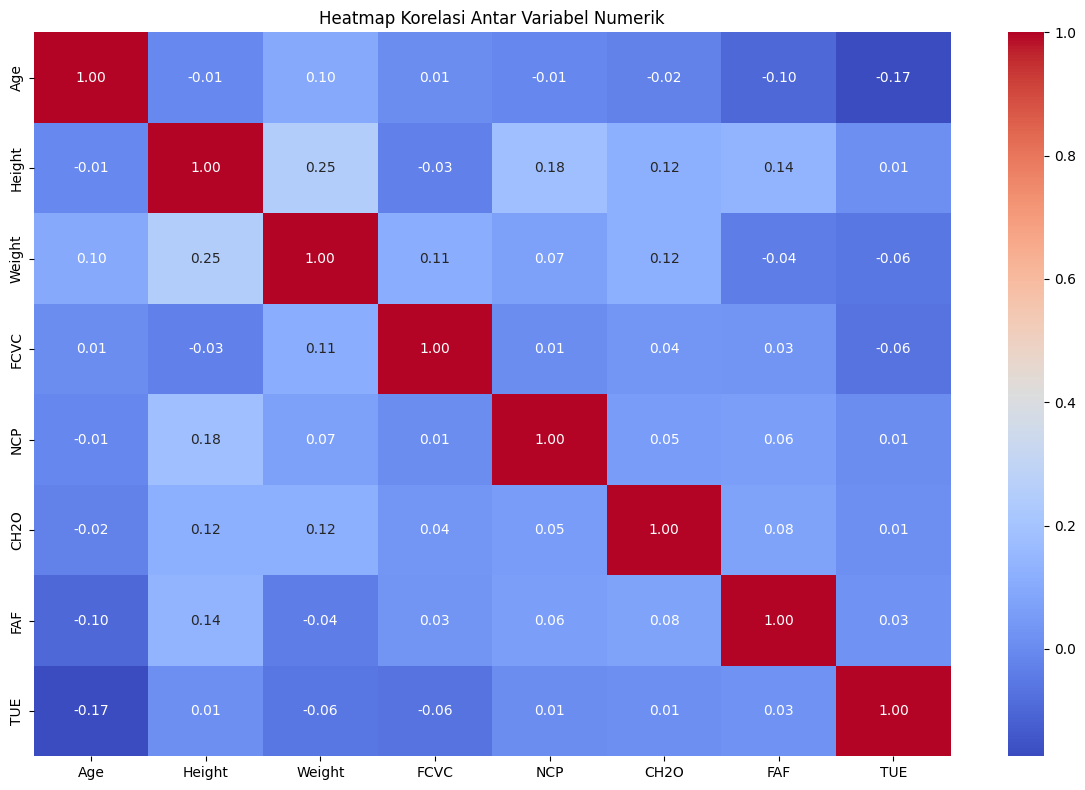

In [8]:
# 4.1 Korelasi antar fitur numerik

# Kolom numerik yang akan dikonversi
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Konversi kolom ke float
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop baris dengan nilai NaN (hasil konversi gagal)
df_cleaned = df.dropna(subset=numeric_columns)

# Korelasi dan heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df_cleaned[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.tight_layout()
plt.show()



**4.2 Distribusi Kelas (Target Balance)**

> Add blockquote



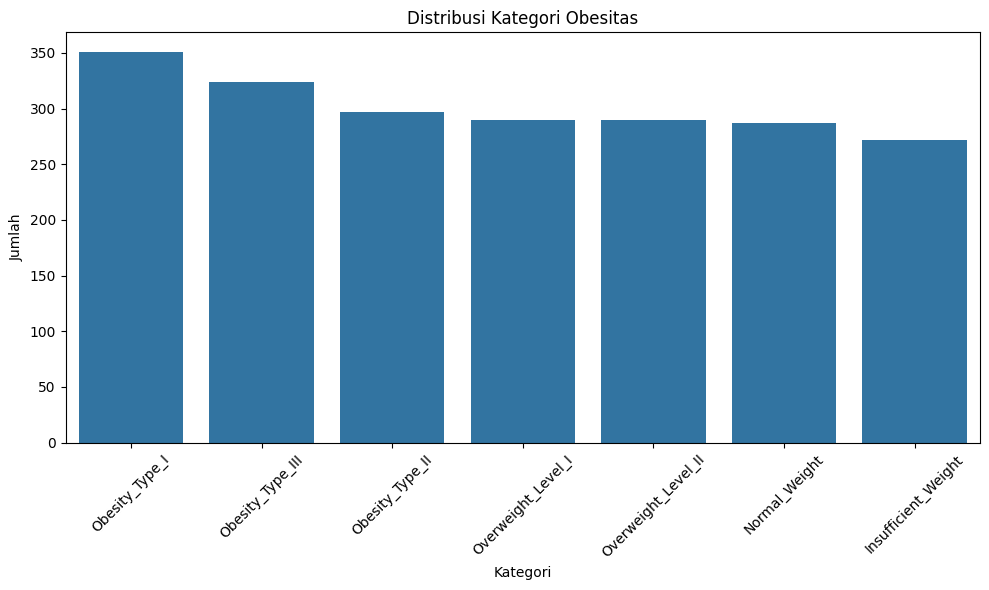

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kategori Obesitas')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


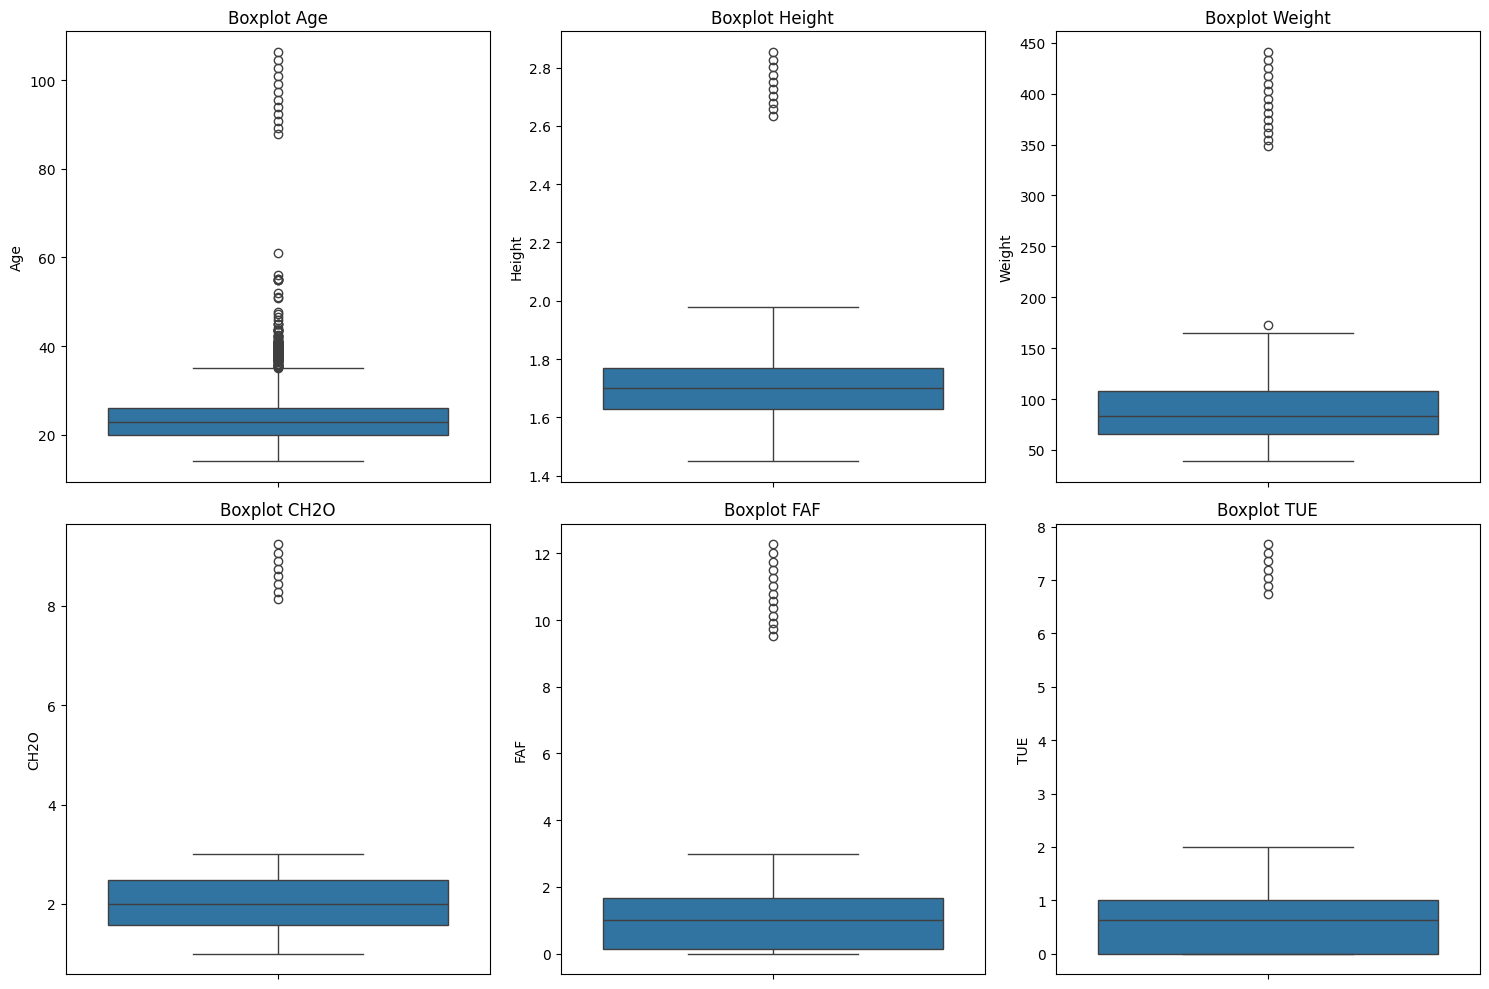

In [10]:
# Kolom numerik kontinu untuk deteksi outlier
numeric_cols = ['Age', 'Height', 'Weight', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()


# **Hasil Proses Exploratory Data Analysis (EDA)**

**1. Informasi Umum Dataset**

*   Jumlah entri: 2111 baris
*   Jumlah kolom: 17
*   Semua kolom bertipe object, yang berarti data numerik seperti Age, Height, dan Weight masih berupa string dan perlu dikonversi ke tipe numerik untuk analisis lebih lanjut.
*   Beberapa kolom memiliki nilai hilang (missing values).

**2. Statistik Deskriptif Kolom Numerik**

* Nilai-nilai ini tidak dapat dihitung sekarang karena semua kolom numerik masih dalam format object. Namun, berdasarkan ringkasan:

* Terdapat ribuan nilai unik dalam kolom numerik seperti Height dan Weight, menandakan data belum dibersihkan atau dikonversi ke tipe yang sesuai.

**3. Missing Values**

Kolom dengan nilai kosong (missing):

* Age, Height, Weight, FCVC, NCP, SCC, CH2O, FAF, TUE, MTRANS, dan lainnya memiliki sejumlah kecil nilai kosong (rata-rata kurang dari 20 dari 2111 baris).

* Tidak terlalu signifikan, namun perlu penanganan (misalnya imputasi).


 **4. Nilai Unik**

Beberapa kolom memiliki jumlah nilai unik yang sangat besar (ribuan), seperti:

* Age: 1394 nilai unik

* Height: 1562 nilai unik

* Weight: 1518 nilai unik

Hal ini menunjukkan kemungkinan Nilai desimal disimpan sebagai string dan Inkonsistensi format Sehingga Perlu konversi ke float dan standarisasi

**5. Duplikat**

Tidak ditemukan data duplikat pada dataset ini.

**6. Distribusi Kelas (Target: NObeyesdad)**

Distribusi kategori obesitas:

* Obesity Type I: 351

* Obesity Type III: 324

* Obesity Type II: 297

* Overweight Level I & II: 290 masing-masing

* Normal Weight: 287

* Insufficient Weight: 272

Distribusi relatif seimbang, artinya tidak ada dominasi kelas yang ekstrem — kondisi ideal untuk model klasifikasi.

**7. Deteksi Outlier**

Statistik deskriptif pada fitur numerik belum tersedia sepenuhnya karena semua masih dalam tipe object. Namun, berdasarkan frekuensi:

Banyak nilai duplikat seperti 80, 1.7, dan 18 muncul sering. Perlu konversi ke float dan eksplorasi lanjut untuk membuat boxplot dan mendeteksi outlier.




# **Kesimpulan EDA Sementara**

1. Dataset relatif bersih dari duplikasi dan cukup seimbang secara label target.

2. Banyak fitur numerik masih dalam format teks (object) — perlu dikonversi agar bisa digunakan untuk visualisasi dan pemodelan.

3. Missing values kecil dan bisa diimputasi dengan rata-rata atau median.

4. Perlu proses pembersihan data sebelum melakukan visualisasi lanjutan dan training model.

5. Visualisasi Data

* **Korelasi Antar Variabel Numerik**
  menunjukan Tidak ada hubungan linear yang dominan antara fitur numerik, sehingga untuk prediksi, perlu mempertimbangkan model non-linear atau teknik feature engineering lainnya.

* **Distribusi Kategori Obesitas**
  menunjukan Dataset ini cukup seimbang antar kelas target, yang baik untuk klasifikasi karena tidak terlalu bias terhadap satu kategori.

* **Boxplot Variabel Numerik**
  Perlu dilakukan penanganan outlier, terutama pada Weight, Age, dan FAF, karena dapat memengaruhi hasil model prediktif secara signifikan



# **2. Preprocessing Data**

### A.  Hapus Missing Values dan Duplikasi

Tujuan:
Membersihkan data dari nilai kosong dan baris yang identik/duplikat.
Data yang duplikat atau kosong dapat mempengaruhi hasil pelatihan model. Oleh karena itu, kita hapus data tersebut agar hasil analisis lebih lebih baik.

Metode:

drop_duplicates() → menghapus baris ganda

dropna() → menghapus baris yang memiliki nilai kosong



In [11]:
# Hapus duplikat dan missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

print(f"Jumlah baris setelah bersih: {df.shape[0]}")

# Cek missing values
missing_values = df.isnull().sum()





Jumlah baris setelah bersih: 1871


### B. Tangani Outlier (Metode IQR)

Tujuan:
Menghapus nilai-nilai ekstrim (outlier) yang bisa merusak hasil pelatihan model. Outlier adalah nilai yang jauh lebih tinggi atau lebih rendah dari data lain, seperti usia 200 tahun. Kita gunakan metode IQR untuk menghapus outlier dari kolom numerik agar data menjadi lebih stabil.

Metode:

IQR (Interquartile Range) → metode statistik untuk mendeteksi dan menghapus nilai yang terlalu jauh dari jangkauan normal. dengan rumus :

IQR = Q3 - Q1
Lower bound = Q1 - 1.5 * IQR
Upper bound = Q3 + 1.5 * IQR


In [12]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df = remove_outliers_iqr(df, numeric_cols)

print(f"Jumlah baris setelah menghapus outlier: {df.shape[0]}")


Jumlah baris setelah menghapus outlier: 1170


###  C Encoding Data Kategorikal (Ubah Data Kategorikal Menjadi Numerik)

Tujuan:
Mengubah data yang berbentuk teks (kategori) menjadi angka agar bisa diproses oleh algoritma machine learning.

Metode:

Label Encoding dengan LabelEncoder() dari sklearn.preprocessing

Penjelasan:
Model machine learning hanya bisa memproses angka. Jadi kita ubah data kategori (seperti gender, kebiasaan makan, dll.) menjadi angka. Misalnya, Male jadi 1 dan Female jadi 0.

In [13]:

label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("Kolom kategorikal telah diencoding.")

# Tampilkan beberapa data setelah pembersihan
df_cleaned.head()


Kolom kategorikal telah diencoding.


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


###  D. Pisahkan Fitur dan Target

Tujuan:
Memisahkan fitur (X) sebagai input dan target (y) sebagai label yang akan diprediksi oleh model.

Metode:

X = df.drop('target')

y = df['target']

Penjelasan:
Kita pisahkan data menjadi:

X: semua kolom kecuali NObeyesdad (fitur yang digunakan untuk memprediksi)

y: kolom NObeyesdad (kelas atau label yang ingin diprediksi)

In [14]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

print("Fitur dan target telah dipisahkan.")


Fitur dan target telah dipisahkan.


### E. Atasi Imbalanced Class dengan SMOTE

 Tujuan:
Menyamakan jumlah data di setiap kelas target agar model tidak berat sebelah.

Metode:

SMOTE (Synthetic Minority Over-sampling Technique)
Teknik ini membuat data sintetis untuk kelas yang jumlahnya sedikit.

Penjelasan:
Jika kelas Obesity_Type_III jauh lebih sedikit daripada kelas Normal_Weight, maka model bisa bias. Dengan SMOTE, kita menambah data sintetis dari kelas minoritas untuk menyeimbangkan dataset.


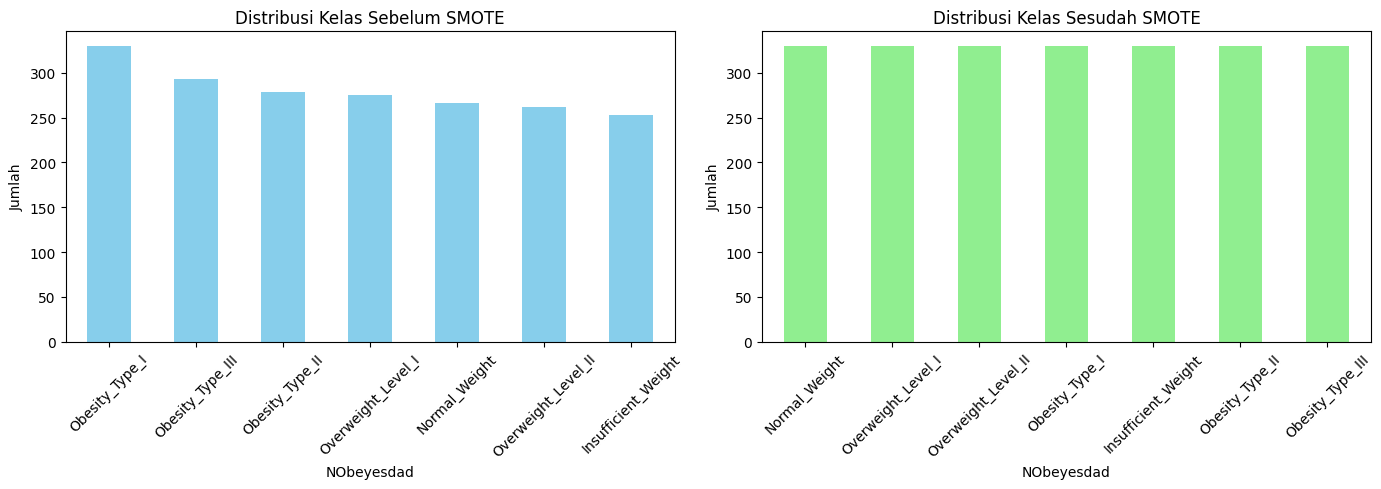

In [15]:

# Asumsikan df_cleaned adalah dataframe bersih (tanpa missing & duplikat)
# Pisahkan fitur dan target
X = df_cleaned.drop(columns=["NObeyesdad"])
y = df_cleaned["NObeyesdad"]

# Ubah semua fitur kategori menjadi numerik
X_encoded = pd.get_dummies(X, drop_first=True)

# SMOTE hanya bisa dilakukan pada data numerik
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Hitung distribusi kelas sebelum dan sesudah
before_counts = y.value_counts()
after_counts = pd.Series(y_resampled).value_counts()

# Visualisasi distribusi kelas sebelum dan sesudah SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

before_counts.plot(kind="bar", ax=axes[0], color='skyblue')
axes[0].set_title("Distribusi Kelas Sebelum SMOTE")
axes[0].set_ylabel("Jumlah")
axes[0].tick_params(axis='x', rotation=45)

after_counts.plot(kind="bar", ax=axes[1], color='lightgreen')
axes[1].set_title("Distribusi Kelas Sesudah SMOTE")
axes[1].set_ylabel("Jumlah")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### F. Normalisasi / Standardisasi Data

 Tujuan:
Menyamakan skala semua fitur agar model bisa mempelajari data secara seimbang.

Metode:

StandardScaler dari sklearn.preprocessing
Mengubah nilai fitur agar memiliki rata-rata 0 dan standar deviasi 1.

Penjelasan:
Beberapa fitur seperti tinggi dan waktu aktivitas punya skala berbeda. Jika tidak disamakan, fitur dengan nilai besar bisa mendominasi. Dengan standarisasi, semua fitur menjadi seimbang untuk diproses model.

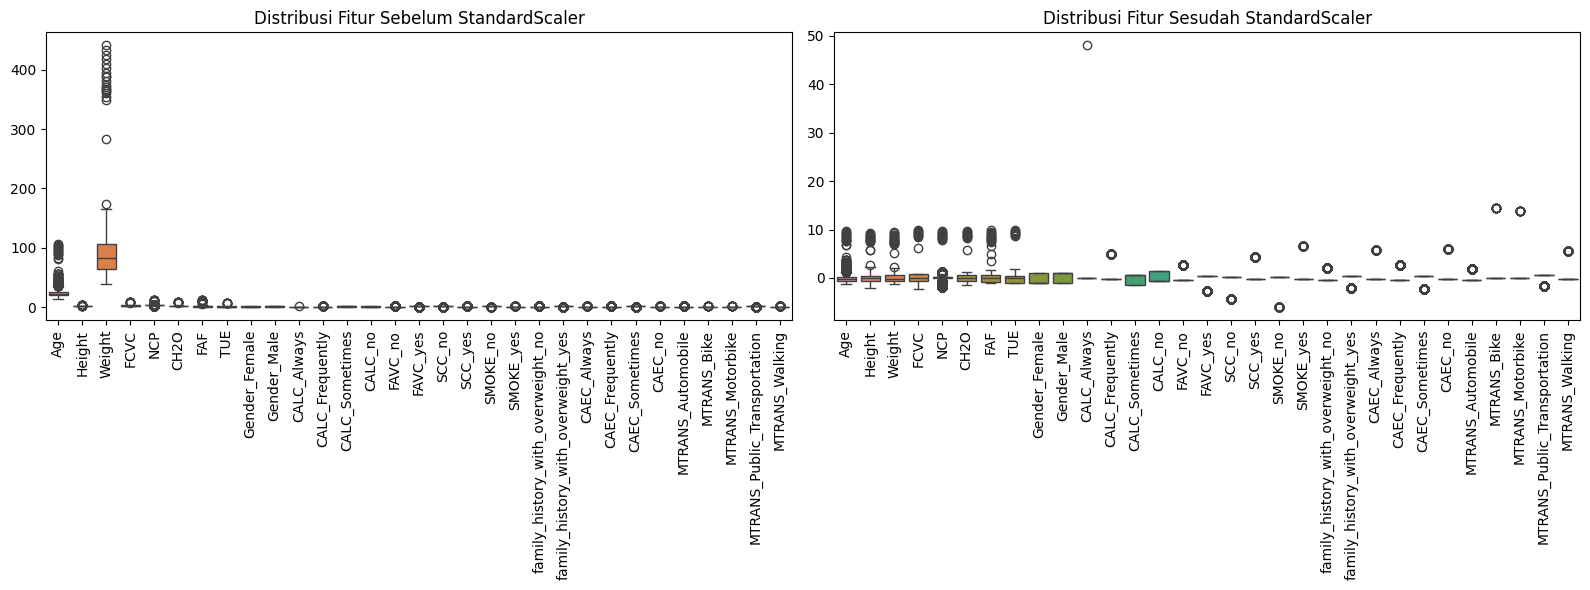

In [16]:

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Konversi kembali ke DataFrame untuk kemudahan visualisasi
X_before = pd.DataFrame(X_resampled, columns=X_resampled.columns)
X_after = pd.DataFrame(X_scaled, columns=X_resampled.columns)

# Visualisasi distribusi nilai fitur sebelum dan sesudah standarisasi
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=X_before, ax=axes[0])
axes[0].set_title("Distribusi Fitur Sebelum StandardScaler")
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(data=X_after, ax=axes[1])
axes[1].set_title("Distribusi Fitur Sesudah StandardScaler")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Simpan hasil akhir
X_final = X_after
y_final = y_resampled


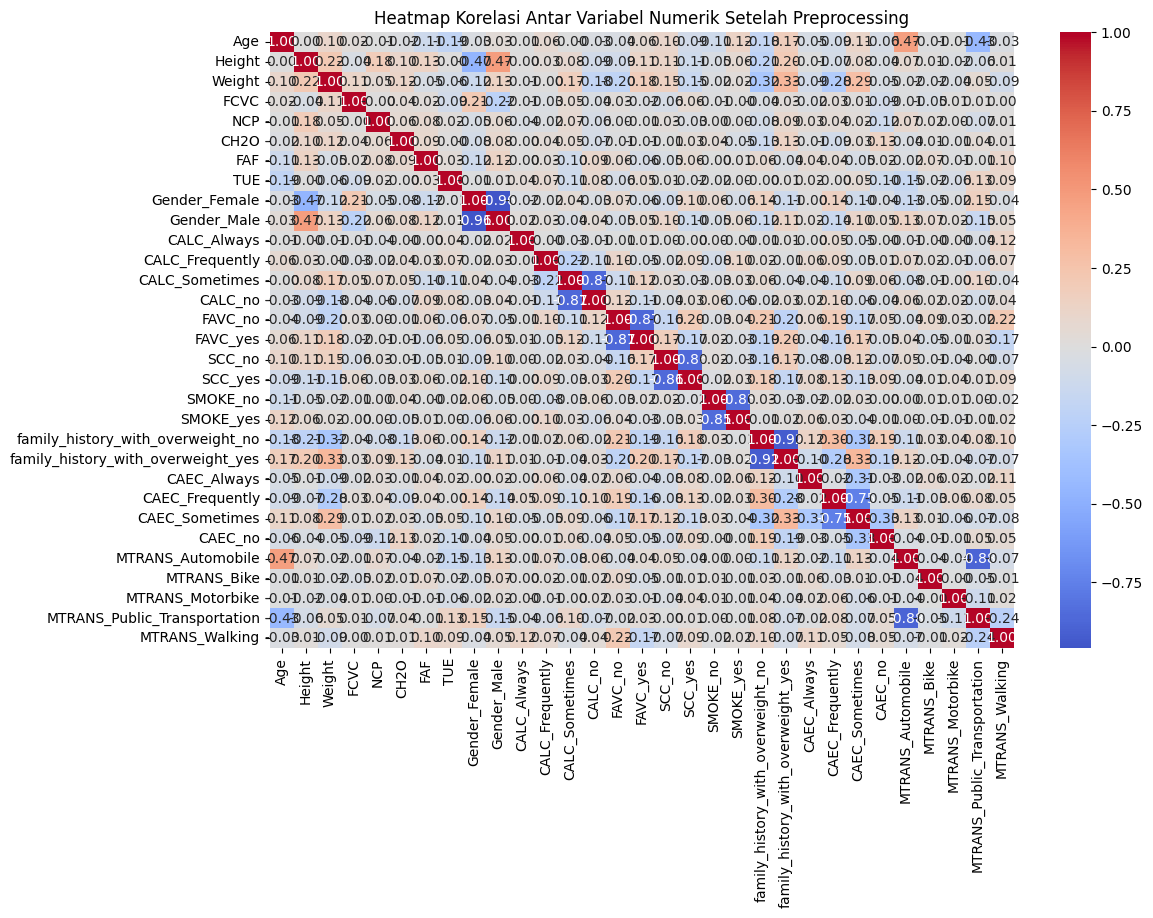

In [17]:

# Jika X_final masih dalam bentuk array NumPy, pastikan dikonversi ke DataFrame
if not isinstance(X_final, pd.DataFrame):
    X_final = pd.DataFrame(X_final, columns=X.columns)

# Hitung korelasi antar fitur numerik
corr_matrix_after = X_final.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_after, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi Antar Variabel Numerik Setelah Preprocessing')
plt.show()


# *3. Pemodelan dan Evaluasi*

### A.  Train-Test Split (80/20)


In [18]:


# Gunakan data hasil preprocessing akhir
X = X_final
y = y_final

# Pisahkan data latih dan uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji  :", X_test.shape[0])


Jumlah data latih: 1848
Jumlah data uji  : 462


### B. Latih Beberapa Model Klasifikasi dan Evaluasi Performa Model

**1.Random forest**

In [19]:

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("=== Evaluasi: Random Forest ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_rf, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))


=== Evaluasi: Random Forest ===
Accuracy : 0.9415584415584416
Precision: 0.9489145054608937
Recall   : 0.9415584415584416
F1 Score : 0.9421662092952748

Confusion Matrix:
 [[67  6  0  0  0  0  0]
 [ 0 71  0  0  0  1  0]
 [ 0  1 57  0  0  0  3]
 [ 0  0  0 65  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0 10  0  0  0 45  2]
 [ 0  2  1  0  0  1 61]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.92      0.96        73
      Normal_Weight       0.79      0.99      0.88        72
     Obesity_Type_I       0.98      0.93      0.96        61
    Obesity_Type_II       1.00      1.00      1.00        65
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       0.96      0.79      0.87        57
Overweight_Level_II       0.92      0.94      0.93        65

           accuracy                           0.94       462
          macro avg       0.95      0.94      0.94       462
       weighted avg   

**2. Suport Vector Machine (SVM)**

In [20]:
# SVM - Sebelum Tuning
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("=== Evaluasi: SVM ===")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_svm, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, target_names=le.classes_))


=== Evaluasi: SVM ===
Accuracy : 0.8051948051948052
Precision: 0.8126295664874196
Recall   : 0.8051948051948052
F1 Score : 0.8057714149408061

Confusion Matrix:
 [[62 10  0  1  0  0  0]
 [ 6 54  1  0  1  7  3]
 [ 1  5 48  2  1  0  4]
 [ 0  1  1 62  0  0  1]
 [ 0  0  0  0 68  0  1]
 [ 1 15  3  1  0 34  3]
 [ 0  7  9  0  0  5 44]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.89      0.85      0.87        73
      Normal_Weight       0.59      0.75      0.66        72
     Obesity_Type_I       0.77      0.79      0.78        61
    Obesity_Type_II       0.94      0.95      0.95        65
   Obesity_Type_III       0.97      0.99      0.98        69
 Overweight_Level_I       0.74      0.60      0.66        57
Overweight_Level_II       0.79      0.68      0.73        65

           accuracy                           0.81       462
          macro avg       0.81      0.80      0.80       462
       weighted avg       0.81  

**3. K-Nearst Neighbours (KNN)**

In [21]:


# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("=== Evaluasi: K-Nearest Neighbors (KNN) ===")
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_knn, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn, target_names=le.classes_))


=== Evaluasi: K-Nearest Neighbors (KNN) ===
Accuracy : 0.7770562770562771
Precision: 0.7717200042994937
Recall   : 0.7770562770562771
F1 Score : 0.7730652694009175

Confusion Matrix:
 [[62  6  0  0  0  4  1]
 [12 38  3  2  1 12  4]
 [ 1  2 51  2  1  1  3]
 [ 0  1  1 63  0  0  0]
 [ 0  0  0  2 66  0  1]
 [ 2 12  4  0  1 34  4]
 [ 0  7  4  6  0  3 45]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.81      0.85      0.83        73
      Normal_Weight       0.58      0.53      0.55        72
     Obesity_Type_I       0.81      0.84      0.82        61
    Obesity_Type_II       0.84      0.97      0.90        65
   Obesity_Type_III       0.96      0.96      0.96        69
 Overweight_Level_I       0.63      0.60      0.61        57
Overweight_Level_II       0.78      0.69      0.73        65

           accuracy                           0.78       462
          macro avg       0.77      0.78      0.77       462
       wei

### C.Kesimpulan  Pemodelan dan Evaluasi Awal




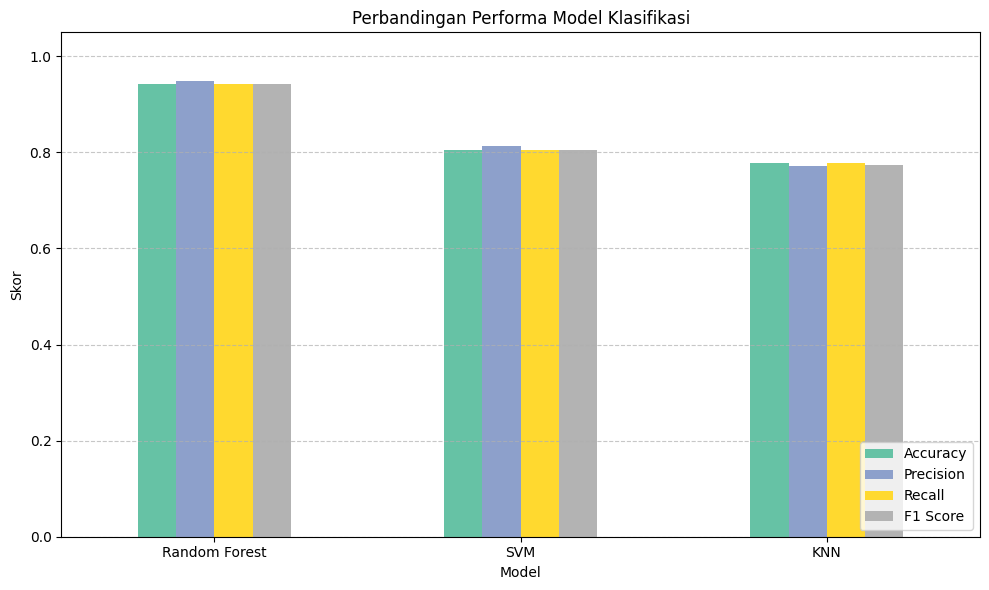

In [22]:

# Buat dataframe dari metrik evaluasi
performance_data = {
    'Model': ['Random Forest', 'SVM', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn)
    ],
    'Precision': [
        precision_score(y_test, y_pred_rf, average='weighted'),
        precision_score(y_test, y_pred_svm, average='weighted'),
        precision_score(y_test, y_pred_knn, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, y_pred_rf, average='weighted'),
        recall_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_knn, average='weighted')
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted')
    ]
}

df_performance = pd.DataFrame(performance_data)

# Plot bar chart
df_performance.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Perbandingan Performa Model Klasifikasi')
plt.ylabel('Skor')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


 **1. Perbandingan Kinerja Model**

Tiga algoritma klasifikasi yang diuji adalah:

| Model                         | Akurasi | Precision | Recall | F1-Score |
| ----------------------------- | ------- | --------- | ------ | -------- |
| **Random Forest**             | 0.94    | 0.95      | 0.94   | 0.94     |
| **SVM**                       | 0.81    | 0.81      | 0.81   | 0.81     |
| **K-Nearest Neighbors (KNN)** | 0.78    | 0.77      | 0.78   | 0.77     |

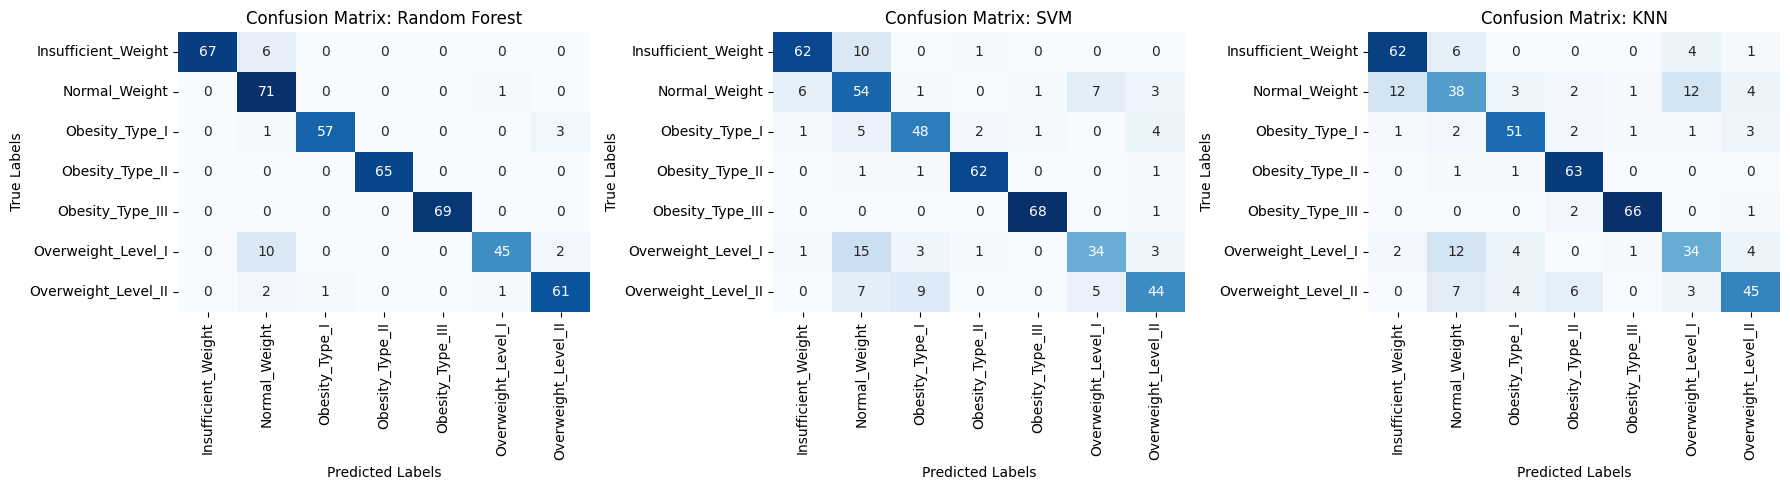

In [23]:


# Setup matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# List of predictions and titles
predictions = [y_pred_rf, y_pred_svm, y_pred_knn]
titles = ['Random Forest', 'SVM', 'KNN']

# Plot each confusion matrix
for i, (y_pred, title) in enumerate(zip(predictions, titles)):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title(f'Confusion Matrix: {title}')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')
    axes[i].set_xticklabels(le.classes_, rotation=90)
    axes[i].set_yticklabels(le.classes_, rotation=0)

plt.tight_layout()
plt.show()


**2. Analisis Klasifikasi Berdasarkan Confusion Matrix**

Random Forest menunjukkan distribusi klasifikasi yang sangat baik, dengan sedikit kesalahan klasifikasi.

SVM dan KNN memiliki lebih banyak kesalahan dalam membedakan kelas yang mirip, terutama pada Normal_Weight, Overweight_Level_I, dan Overweight_Level_II.

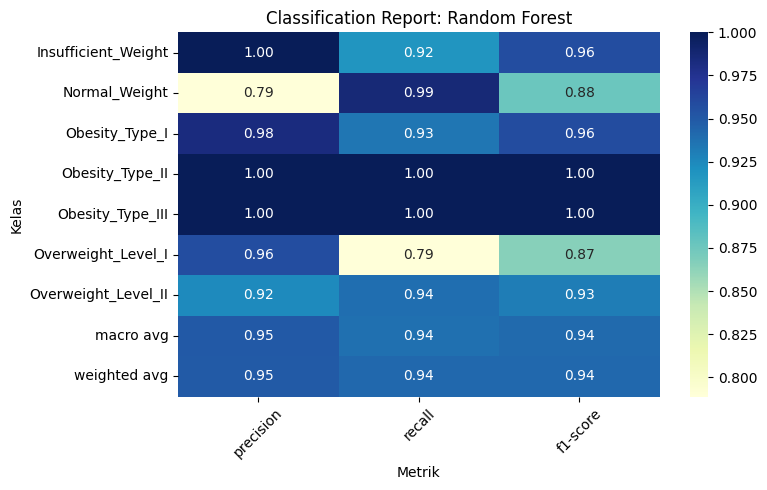

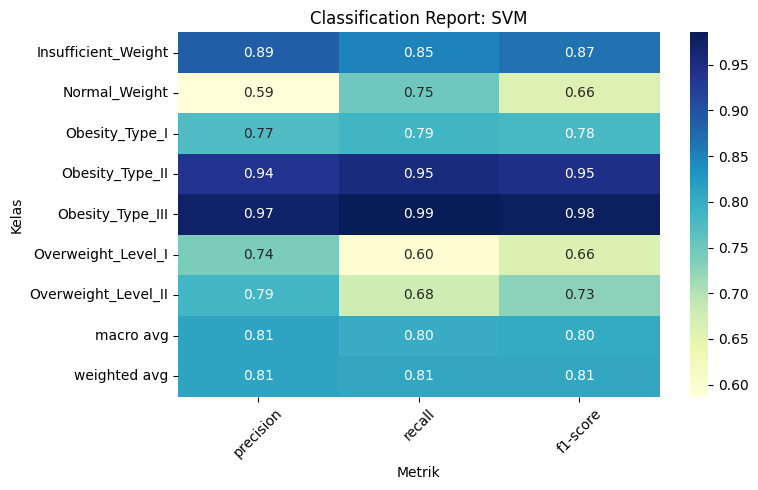

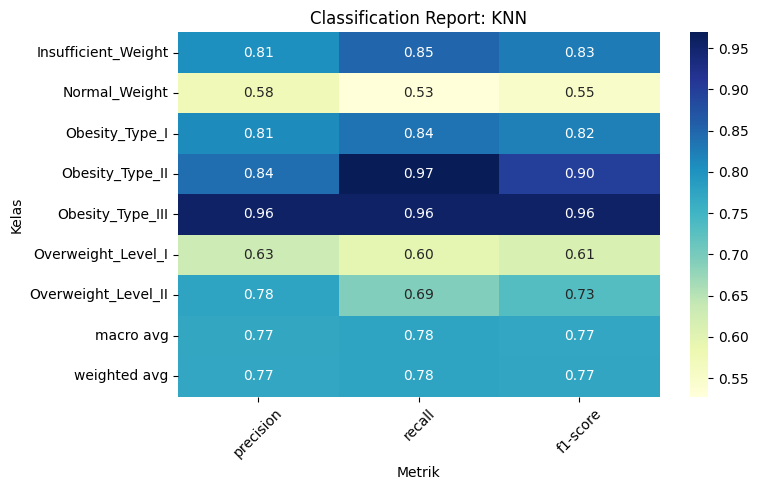

In [24]:


# Fungsi bantu untuk mengubah classification report ke DataFrame
def plot_classification_report_heatmap(y_true, y_pred, title):
    report_dict = classification_report(y_true, y_pred, output_dict=True, target_names=le.classes_)
    report_df = pd.DataFrame(report_dict).drop(columns=['accuracy']).T.drop('support', axis=1)
    
    plt.figure(figsize=(8, 5))
    sns.heatmap(report_df, annot=True, cmap='YlGnBu', fmt='.2f', cbar=True)
    plt.title(f'Classification Report: {title}')
    plt.ylabel('Kelas')
    plt.xlabel('Metrik')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Visualisasi untuk setiap model
plot_classification_report_heatmap(y_test, y_pred_rf, 'Random Forest')
plot_classification_report_heatmap(y_test, y_pred_svm, 'SVM')
plot_classification_report_heatmap(y_test, y_pred_knn, 'KNN')



**3. Implikasi**

Random Forest sangat direkomendasikan sebagai baseline model untuk dataset ini karena menghasilkan metrik yang sangat baik bahkan tanpa tuning.

SVM dan KNN masih bisa ditingkatkan performanya, terutama melalui Hyperparameter Tuning, normalisasi data lebih baik, atau pengurangan dimensi.

# **4. Hyperparameter Tuning**

### A. Hyperparameter menggunakan RandomizedSearchCV

Pertimbangan saya menggunkan RandomizedSearchCV adalah Lebih cepat, karena hanya mencoba kombinasi acak dari parameter dan fleksibel jika kamu punya keterbatasan waktu atau sumber daya.

**1. Random Forest**

In [25]:
# === 1. Menentukan parameter grid untuk Random Forest ===
param_rf = {
    'bootstrap': [False],              # Tidak menggunakan bootstrap sampling
    'criterion': ['entropy'],          # Gunakan entropi sebagai fungsi pemisahan
    'max_depth': [35],                 # Kedalaman maksimum pohon adalah 35
    'max_features': ['sqrt'],          # Fitur yang dipertimbangkan pada setiap split adalah akar dari total fitur
    'min_samples_leaf': [1],           # Minimal sampel pada daun pohon
    'min_samples_split': [2],          # Minimal sampel untuk membagi node
    'n_estimators': [296]              # Jumlah pohon (estimators) dalam hutan
}

# === 2. Membuat model Random Forest ===
rf_model = RandomForestClassifier(random_state=42)

# === 3. RandomizedSearchCV untuk tuning hyperparameter ===
random_search_rf = RandomizedSearchCV(
    rf_model, param_rf,
    n_iter=1,                  # Karena hanya satu kombinasi parameter, iterasi = 1
    scoring='f1_weighted',     # Gunakan F1-score tertimbang sebagai metrik evaluasi
    cv=5,                      # Validasi silang 5-fold
    verbose=1,                 # Tampilkan log progress
    random_state=42,           # Agar hasil dapat direproduksi
    n_jobs=-1                  # Gunakan seluruh core CPU
)

# === 4. Latih model dengan parameter yang ditentukan ===
random_search_rf.fit(X_train, y_train)

# Tampilkan parameter dan skor terbaik dari hasil tuning
print("Best Random Forest Params:", random_search_rf.best_params_)
print("Best Score (F1):", random_search_rf.best_score_)

# === 5. Prediksi data uji dengan model terbaik ===
y_pred_best_rf = random_search_rf.best_estimator_.predict(X_test)

# === 6. Evaluasi performa model Random Forest ===
print("\n=== Random Forest ===")
print("Accuracy :", accuracy_score(y_test, y_pred_best_rf))                             # Akurasi prediksi
print("Precision:", precision_score(y_test, y_pred_best_rf, average='weighted'))        # Presisi rata-rata tertimbang
print("Recall   :", recall_score(y_test, y_pred_best_rf, average='weighted'))           # Recall rata-rata tertimbang
print("F1 Score :", f1_score(y_test, y_pred_best_rf, average='weighted'))               # F1-score rata-rata tertimbang

# === 7. Tampilkan confusion matrix dan laporan klasifikasi lengkap ===
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))                # Matriks kesalahan
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf, target_names=le.classes_))  # Laporan lengkap tiap kelas


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Random Forest Params: {'n_estimators': 296, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 35, 'criterion': 'entropy', 'bootstrap': False}
Best Score (F1): 0.950855043458526

=== Random Forest ===
Accuracy : 0.9458874458874459
Precision: 0.9515083945138804
Recall   : 0.9458874458874459
F1 Score : 0.9463361738477408

Confusion Matrix:
 [[67  5  1  0  0  0  0]
 [ 0 71  0  0  0  0  1]
 [ 0  1 57  0  0  0  3]
 [ 0  0  0 65  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  9  0  0  0 47  1]
 [ 0  1  2  0  0  1 61]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       1.00      0.92      0.96        73
      Normal_Weight       0.82      0.99      0.89        72
     Obesity_Type_I       0.95      0.93      0.94        61
    Obesity_Type_II       1.00      1.00      1.00        65
   Obesity_Type_III       1.00      1.00      1.00        69
 

In [26]:
print(X_train.columns)

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Female', 'Gender_Male', 'CALC_Always', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'FAVC_no', 'FAVC_yes', 'SCC_no', 'SCC_yes',
       'SMOKE_no', 'SMOKE_yes', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')


**2. SVM**

In [27]:
# === 1. Membuat Pipeline SVM dengan StandardScaler dan SMOTE ===
svm_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),        # Standardisasi fitur agar berdistribusi normal (mean=0, std=1)
    ('smote', SMOTE(random_state=42)),   # Menyeimbangkan data dengan oversampling kelas minoritas
    ('svm', SVC())                       # Model klasifikasi SVM (Support Vector Machine)
])

# === 2. Menentukan grid parameter untuk tuning hyperparameter SVM ===
param_svm = {
    'svm__C': uniform(0.1, 100),           # Regularisasi: besar kecilnya margin (semakin besar = overfitting)
    'svm__gamma': uniform(0.0001, 0.1),    # Parameter kernel RBF (kontrol pengaruh satu data terhadap lainnya)
    'svm__kernel': ['rbf']                # Gunakan kernel radial basis function
}

# === 3. Randomized Search CV untuk tuning hyperparameter ===
random_search_svm = RandomizedSearchCV(
    svm_pipeline,         # Pipeline yang menggabungkan preprocessing + model
    param_svm,            # Parameter grid untuk SVM
    n_iter=30,            # Coba 30 kombinasi acak
    cv=5,                 # Validasi silang 5-fold
    scoring='f1_weighted',# Gunakan skor F1 tertimbang sebagai metrik utama
    random_state=42,      # Agar hasilnya reproducible
    verbose=1,            # Tampilkan progress saat fitting
    n_jobs=-1             # Gunakan semua core CPU
)

# === 4. Melatih model SVM terbaik berdasarkan kombinasi parameter terbaik ===
random_search_svm.fit(X_train, y_train)

# === 5. Menampilkan hasil tuning ===
print("Best SVM Params:", random_search_svm.best_params_)     # Parameter terbaik hasil tuning
print("Best Score (F1):", random_search_svm.best_score_)      # Skor F1 terbaik selama validasi silang

# === 6. Prediksi data uji menggunakan model SVM terbaik ===
y_pred_best_svm = random_search_svm.best_estimator_.predict(X_test)

# === 7. Evaluasi performa model ===
print("\n=== Evaluasi: SVM (Tuned + SMOTE) ===")
print("Accuracy :", accuracy_score(y_test, y_pred_best_svm))  # Akurasi total prediksi benar
print("Precision:", precision_score(y_test, y_pred_best_svm, average='weighted'))  # Presisi rata-rata tertimbang
print("Recall   :", recall_score(y_test, y_pred_best_svm, average='weighted'))     # Recall rata-rata tertimbang
print("F1 Score :", f1_score(y_test, y_pred_best_svm, average='weighted'))         # F1-score rata-rata tertimbang

# === 8. Matriks kebingungan dan laporan klasifikasi per kelas ===
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_svm))  # Menunjukkan kesalahan dan prediksi benar per kelas
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_svm, target_names=le.classes_))  # Detail metrik untuk tiap kelas


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best SVM Params: {'svm__C': np.float64(61.28528947223795), 'svm__gamma': np.float64(0.014049386065204183), 'svm__kernel': 'rbf'}
Best Score (F1): 0.9091511859144236

=== Evaluasi: SVM (Tuned + SMOTE) ===
Accuracy : 0.9025974025974026
Precision: 0.9076108114904453
Recall   : 0.9025974025974026
F1 Score : 0.9036556461359826

Confusion Matrix:
 [[66  7  0  0  0  0  0]
 [ 6 62  0  0  0  3  1]
 [ 0  2 56  0  1  0  2]
 [ 0  1  0 63  0  0  1]
 [ 0  0  0  3 66  0  0]
 [ 0 10  1  0  0 45  1]
 [ 0  2  2  1  0  1 59]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.92      0.90      0.91        73
      Normal_Weight       0.74      0.86      0.79        72
     Obesity_Type_I       0.95      0.92      0.93        61
    Obesity_Type_II       0.94      0.97      0.95        65
   Obesity_Type_III       0.99      0.96      0.97        69
 Overweight_Level_I       0.92   

**3. KNN**

In [28]:
# === 1. Menentukan Grid Parameter untuk KNN ===
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Grid parameter untuk mencari kombinasi terbaik secara acak
param_knn = {
    'n_neighbors': randint(3, 20),  # Banyaknya tetangga (k) antara 3 sampai 20
    'weights': ['uniform', 'distance'],  # Bobot: semua sama (uniform) atau berdasarkan jarak (distance)
    'metric': ['euclidean', 'manhattan']  # Metode pengukuran jarak
}

# === 2. Inisialisasi model KNN ===
knn_model = KNeighborsClassifier()

# === 3. Randomized Search CV untuk tuning hyperparameter ===
random_search_knn = RandomizedSearchCV(
    knn_model,           # Model yang akan dituning
    param_knn,           # Parameter grid
    n_iter=20,           # Coba 20 kombinasi parameter secara acak
    scoring='f1_weighted',  # Gunakan skor F1 (weighted) sebagai metrik evaluasi
    cv=5,                # Validasi silang (cross-validation) 5-fold
    verbose=1,           # Tampilkan progress selama training
    random_state=42,     # Agar hasil acak bisa direproduksi
    n_jobs=-1            # Gunakan semua core CPU untuk mempercepat
)

# === 4. Melatih model dengan data training dan mencari parameter terbaik ===
random_search_knn.fit(X_train, y_train)

# Menampilkan parameter terbaik dan skor F1 terbaik dari validasi silang
print("Best KNN Params:", random_search_knn.best_params_)
print("Best Score (F1):", random_search_knn.best_score_)

# === 5. Prediksi menggunakan model terbaik pada data uji ===
y_pred_best_knn = random_search_knn.best_estimator_.predict(X_test)

# === 6. Evaluasi model menggunakan berbagai metrik ===
print("\n=== KNN ===")
print("Accuracy :", accuracy_score(y_test, y_pred_best_knn))  # Akurasi total
print("Precision:", precision_score(y_test, y_pred_best_knn, average='weighted'))  # Presisi rata-rata tertimbang
print("Recall   :", recall_score(y_test, y_pred_best_knn, average='weighted'))  # Recall rata-rata tertimbang
print("F1 Score :", f1_score(y_test, y_pred_best_knn, average='weighted'))  # F1-score rata-rata tertimbang

# === 7. Tampilkan confusion matrix dan laporan klasifikasi ===
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_knn))  # Matriks kebingungan
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_knn, target_names=le.classes_))  # Laporan per kelas


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Score (F1): 0.8493937361714428

=== KNN ===
Accuracy : 0.8658008658008658
Precision: 0.8637450962129312
Recall   : 0.8658008658008658
F1 Score : 0.8641172548207232

Confusion Matrix:
 [[66  7  0  0  0  0  0]
 [ 5 49  4  0  1  7  6]
 [ 1  1 54  1  1  0  3]
 [ 0  1  1 63  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  8  3  2  0 41  3]
 [ 0  2  2  0  0  3 58]]

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.92      0.90      0.91        73
      Normal_Weight       0.72      0.68      0.70        72
     Obesity_Type_I       0.84      0.89      0.86        61
    Obesity_Type_II       0.95      0.97      0.96        65
   Obesity_Type_III       0.97      1.00      0.99        69
 Overweight_Level_I       0.80      0.72      0.76        57
Overweight_Level_II       0.83      0.89     

### B. Kesimpulan

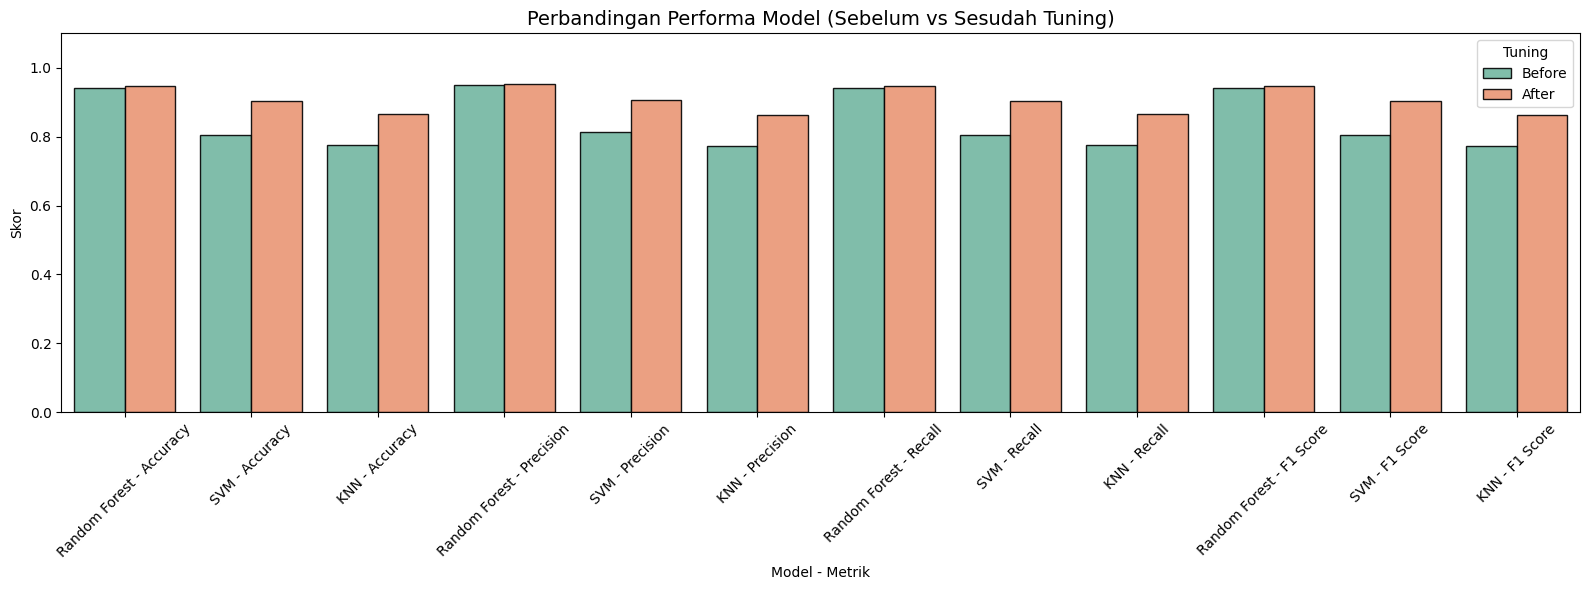

In [29]:
# Buat ulang df_all jika belum ada
before_metrics = {
    'Model': ['Random Forest', 'SVM', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn)
    ],
    'Precision': [
        precision_score(y_test, y_pred_rf, average='weighted'),
        precision_score(y_test, y_pred_svm, average='weighted'),
        precision_score(y_test, y_pred_knn, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, y_pred_rf, average='weighted'),
        recall_score(y_test, y_pred_svm, average='weighted'),
        recall_score(y_test, y_pred_knn, average='weighted')
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_rf, average='weighted'),
        f1_score(y_test, y_pred_svm, average='weighted'),
        f1_score(y_test, y_pred_knn, average='weighted')
    ]
}

after_metrics = {
    'Model': ['Random Forest', 'SVM', 'KNN'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_best_rf),
        accuracy_score(y_test, y_pred_best_svm),
        accuracy_score(y_test, y_pred_best_knn)
    ],
    'Precision': [
        precision_score(y_test, y_pred_best_rf, average='weighted'),
        precision_score(y_test, y_pred_best_svm, average='weighted'),
        precision_score(y_test, y_pred_best_knn, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, y_pred_best_rf, average='weighted'),
        recall_score(y_test, y_pred_best_svm, average='weighted'),
        recall_score(y_test, y_pred_best_knn, average='weighted')
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_best_rf, average='weighted'),
        f1_score(y_test, y_pred_best_svm, average='weighted'),
        f1_score(y_test, y_pred_best_knn, average='weighted')
    ]
}

df_before = pd.DataFrame(before_metrics).melt(id_vars='Model', var_name='Metric', value_name='Score')
df_before['Tuning'] = 'Before'

df_after = pd.DataFrame(after_metrics).melt(id_vars='Model', var_name='Metric', value_name='Score')
df_after['Tuning'] = 'After'

df_all = pd.concat([df_before, df_after])

# Membuat label gabungan untuk sumbu X (Model + Metric)
df_all['Model_Metric'] = df_all['Model'] + ' - ' + df_all['Metric']

# Plot
plt.figure(figsize=(16, 6))
sns.barplot(
    data=df_all,
    x='Model_Metric',
    y='Score',
    hue='Tuning',
    palette='Set2',
    errorbar=None,
    alpha=0.9,
    edgecolor='black'
)

plt.title('Perbandingan Performa Model (Sebelum vs Sesudah Tuning)', fontsize=14)
plt.ylabel('Skor')
plt.xlabel('Model - Metrik')
plt.xticks(rotation=45)
plt.legend(title='Tuning')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()


**1. Random Forest**

| Metrik    | Sebelum Tuning | Setelah Tuning | Perubahan |
| --------- | -------------- | -------------- | --------- |
| Accuracy  | 94.16%         | 94.59%         | ↑ +0.43%  |
| Precision | 94.89%         | 95.15%         | ↑ +0.26%  |
| Recall    | 94.16%         | 94.59%         | ↑ +0.43%  |
| F1 Score  | 94.22%         | 94.63%         | ↑ +0.41%  |


**2. Support Vector Machine (SVM)**

| Metrik    | Sebelum Tuning | Setelah Tuning | Perubahan |
| --------- | -------------- | -------------- | --------- |
| Accuracy  | 80.52%         | 90.26%         | ↑ +9.74%  |
| Precision | 81.26%         | 90.76%         | ↑ +9.50%  |
| Recall    | 80.52%         | 90.26%         | ↑ +9.74%  |
| F1 Score  | 80.58%         | 90.37%         | ↑ +9.79%  |

**3. K-Nearest Neighbors (KNN)**

| Metrik    | Sebelum Tuning | Setelah Tuning | Perubahan |
| --------- | -------------- | -------------- | --------- |
| Accuracy  | 77.71%         | 86.58%         | ↑ +8.87%  |
| Precision | 77.17%         | 86.37%         | ↑ +9.20%  |
| Recall    | 77.71%         | 86.58%         | ↑ +8.87%  |
| F1 Score  | 77.31%         | 86.41%         | ↑ +9.10%  |


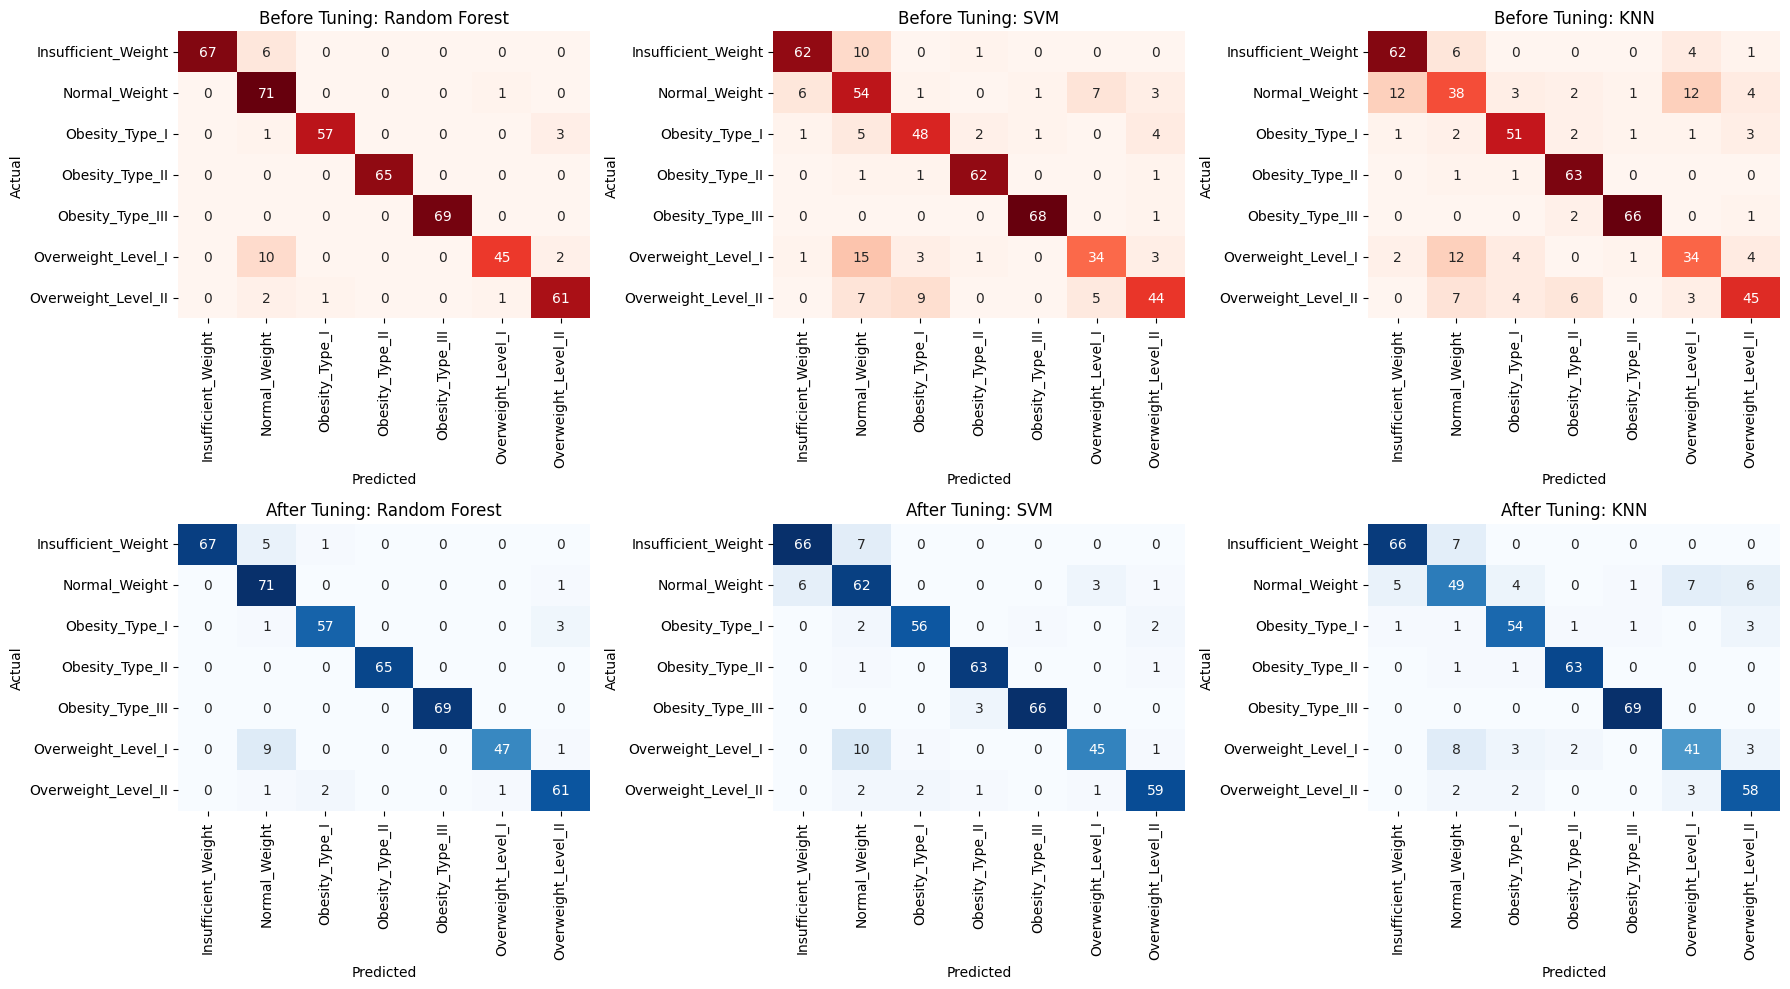

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
titles = ['Random Forest', 'SVM', 'KNN']

# Prediksi sebelum dan sesudah tuning
preds_before = [y_pred_rf, y_pred_svm, y_pred_knn]
preds_after = [y_pred_best_rf, y_pred_best_svm, y_pred_best_knn]

for i in range(3):
    # Confusion Matrix Before Tuning
    cm_before = confusion_matrix(y_test, preds_before[i])
    sns.heatmap(cm_before, annot=True, fmt='d', cmap='Reds', ax=axes[0, i], cbar=False)
    axes[0, i].set_title(f'Before Tuning: {titles[i]}')
    axes[0, i].set_xlabel('Predicted')
    axes[0, i].set_ylabel('Actual')
    axes[0, i].set_xticklabels(le.classes_, rotation=90)
    axes[0, i].set_yticklabels(le.classes_, rotation=0)

    # Confusion Matrix After Tuning
    cm_after = confusion_matrix(y_test, preds_after[i])
    sns.heatmap(cm_after, annot=True, fmt='d', cmap='Blues', ax=axes[1, i], cbar=False)
    axes[1, i].set_title(f'After Tuning: {titles[i]}')
    axes[1, i].set_xlabel('Predicted')
    axes[1, i].set_ylabel('Actual')
    axes[1, i].set_xticklabels(le.classes_, rotation=90)
    axes[1, i].set_yticklabels(le.classes_, rotation=0)

plt.tight_layout()
plt.show()



**1. Random Forest**

Confusion Matrix dan Classification Report:

Sebelum tuning, model sudah sangat baik namun terdapat sedikit kesalahan klasifikasi di kelas Overweight_Level_I (hanya 45 benar dari 57).

Setelah tuning, terjadi perbaikan di beberapa kelas, khususnya Normal_Weight (F1 meningkat dari 0.88 ke 0.89), dan kesalahan klasifikasi berkurang.

Kesimpulan: Tuning memberi perbaikan kecil tapi konsisten. Random Forest tetap model dengan performa terbaik.

**2. Support Vector Machine (SVM)**

Confusion Matrix dan Classification Report:

Sebelum tuning, model kesulitan mengenali kelas Normal_Weight dan Overweight_Level_I (F1 di bawah 0.70).

Setelah tuning, hasil meningkat drastis di hampir semua kelas. Misalnya, Normal_Weight F1 meningkat dari 0.66 ke 0.79.

Kesimpulan: Tuning SVM sangat efektif, mengubah model dari cukup lemah menjadi sangat kompetitif.


**3. K-Nearest Neighbors (KNN)**

Confusion Matrix dan Classification Report:

Sebelum tuning, akurasi rendah terutama di Normal_Weight (F1 hanya 0.55) dan Overweight_Level_I.

Setelah tuning, peningkatan signifikan di semua kelas. Obesity_Type_I dan Overweight_Level_II menjadi lebih stabil.

Kesimpulan: Sama seperti SVM, tuning sangat membantu KNN dalam mengenali pola antar kelas.


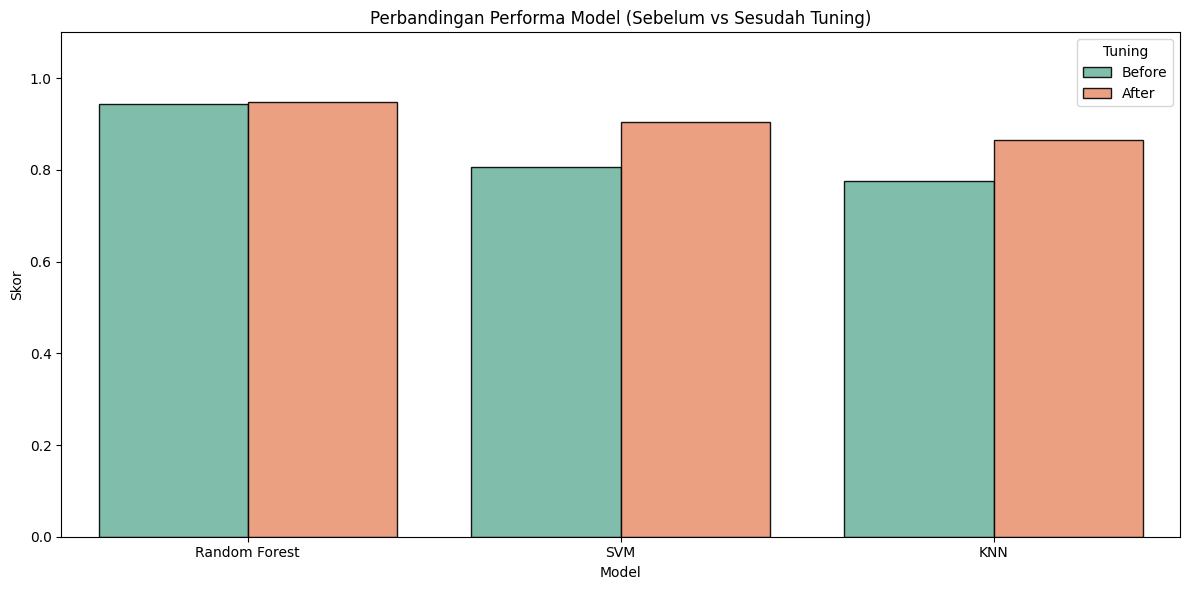

In [31]:

# Convert ke DataFrame dan reshape
df_before = pd.DataFrame(before_metrics).melt(id_vars='Model', var_name='Metric', value_name='Score')
df_before['Tuning'] = 'Before'

df_after = pd.DataFrame(after_metrics).melt(id_vars='Model', var_name='Metric', value_name='Score')
df_after['Tuning'] = 'After'

df_all = pd.concat([df_before, df_after])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_all, x='Model', y='Score', hue='Tuning', palette='Set2', errorbar=None, alpha=0.9, edgecolor='black')

plt.title('Perbandingan Performa Model (Sebelum vs Sesudah Tuning)')
plt.ylabel('Skor')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(title='Tuning')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()


| Model | Accuracy Sebelum | Accuracy Setelah | F1 Score Sebelum | F1 Score Setelah |
| ----- | ---------------- | ---------------- | ---------------- | ---------------- |
| RF    | 94.16%           | 94.59%           | 94.22%           | 94.63%           |
| SVM   | 80.52%           | 90.26%           | 80.58%           | 90.37%           |
| KNN   | 77.71%           | 86.58%           | 77.31%           | 86.41%           |

Random Forest tetap yang paling konsisten baik sebelum maupun sesudah tuning.

SVM dan KNN menunjukkan lonjakan besar dalam performa setelah dilakukan tuning hyperparameter.

Seluruh model mengalami peningkatan recall dan F1-score, artinya model lebih baik dalam mengenali semua kelas secara merata.



### **Simpan Model Terbaik**

In [32]:
import os
import joblib

# Definisikan path secara raw string untuk menghindari error escape character
model_path = r'C:\Users\Anhar\Documents\#semester 6\Bengkod\capstone-obesity-prediction\app\rf_model.pkl'

# Buat folder-nya kalau belum ada
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Simpan model (pastikan best_rf_model adalah objek model, bukan hasil prediksi)
joblib.dump(random_search_rf.best_estimator_, model_path)


['C:\\Users\\Anhar\\Documents\\#semester 6\\Bengkod\\capstone-obesity-prediction\\app\\rf_model.pkl']